In [49]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib import style

In [50]:
data=pd.read_csv('deliveries.csv')

In [51]:
runs=data[(data.batsman_runs!=0)]
runs.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
7,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,1,S Dhawan,DA Warner,A Choudhary,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [52]:
player=data[(data.batsman_runs!=0)&(data.batsman)]
player


,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
7,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,1,S Dhawan,DA Warner,A Choudhary,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
8,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,2,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
10,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,4,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
13,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,7,MC Henriques,S Dhawan,A Choudhary,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
14,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,3,1,S Dhawan,MC Henriques,TS Mills,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
17,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,3,4,MC Henriques,S Dhawan,TS Mills,0,...,0,0,0,0,3,0,3,NaN,NaN,NaN
18,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,3,5,S Dhawan,MC Henriques,TS Mills,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
19,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,3,6,MC Henriques,S Dhawan,TS Mills,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
21,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,4,2,MC Henriques,S Dhawan,YS Chahal,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [53]:
 player[['match_id','batsman','batsman_runs']].head(2)

,match_id,batsman,batsman_runs
2,1,DA Warner,4
7,1,S Dhawan,1


In [54]:
#no of hundreds by a player

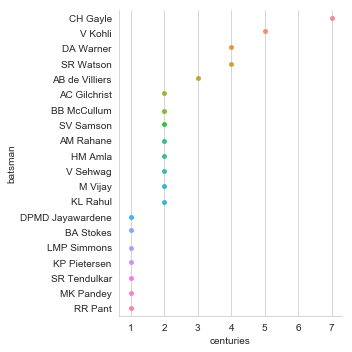

In [55]:
runsinmatch = data.groupby(["batsman","match_id"]).agg({'batsman_runs':'sum'}).reset_index()
runsinmatch.sort_values(by="batsman_runs",ascending=False)
hundred=runsinmatch[runsinmatch["batsman_runs"]>=100]
hundred=hundred["batsman"].value_counts().reset_index()
hundred.columns=["batsman","centuries"]
hundred.head(2)
sns.set_style("whitegrid")
sns.catplot(x="centuries",y="batsman",data=hundred.head(20))

In [56]:
#no of fifties by a player

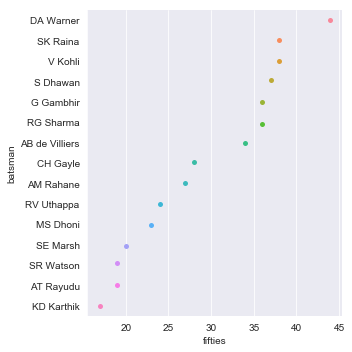

In [57]:
runsinmatch = data.groupby(["batsman","match_id"]).agg({'batsman_runs':'sum'}).reset_index()
runsinmatch.sort_values(by="batsman_runs",ascending=False)
fifty=runsinmatch[(runsinmatch["batsman_runs"]<100)&(runsinmatch["batsman_runs"]>=50)]
fifty=fifty["batsman"].value_counts().reset_index()
fifty.columns=["batsman","fifties"]
sns.set_style("darkgrid")
sns.catplot(x="fifties",y="batsman",data=fifty.head(15))

In [58]:
#no of catches by a player

In [59]:
type=data[(data.dismissal_kind=='caught')]


In [60]:
player=data[(data.fielder.notnull())&(data.dismissal_kind=='caught')]
player.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
11,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,5,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,0,0,0,DA Warner,caught,Mandeep Singh
64,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,11,3,S Dhawan,MC Henriques,STR Binny,0,...,0,0,0,0,0,0,0,S Dhawan,caught,Sachin Baby


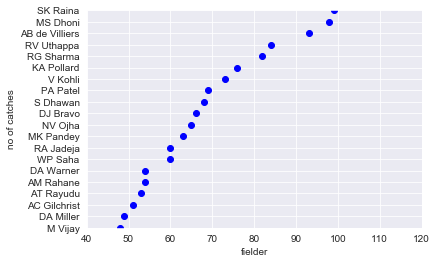

In [61]:
caught=player["fielder"].value_counts().reset_index()
caught.columns=["fielder","no of catches"]
plt.xlabel('fielder')
plt.ylabel('no of catches')
plt.xlim(40,120)
plt.ylim(20)
plt.scatter(x='no of catches',y='fielder',color='b',data=caught)
plt.show()

In [62]:
#wins by DLS method

In [63]:
df=pd.read_csv("matches.csv")

In [64]:
method= df.loc[ df['dl_applied'] != 0]

In [65]:
new=df.loc[ df['dl_applied']!=0,['dl_applied','winner']]
dls=new["winner"].value_counts().reset_index()
dls.columns=["team","count"]
dls

,team,count
0,Kolkata Knight Riders,4
1,Royal Challengers Bangalore,3
2,Chennai Super Kings,2
3,Sunrisers Hyderabad,2
4,Kings XI Punjab,2
5,Rising Pune Supergiants,2
6,Delhi Daredevils,2
7,Rajasthan Royals,1
8,Kochi Tuskers Kerala,1


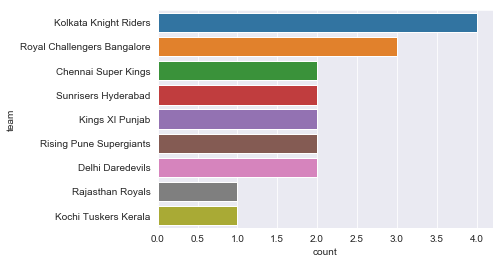

In [66]:
sns.set_style("darkgrid")
sns.barplot(x="count",y="team",data=dls)

In [67]:
#no of matches played in a stadium

In [68]:
place=df.venue.value_counts().reset_index()
place.columns=["stadium","counts"]
place.head(2)


,stadium,counts
0,Eden Gardens,77
1,M Chinnaswamy Stadium,73


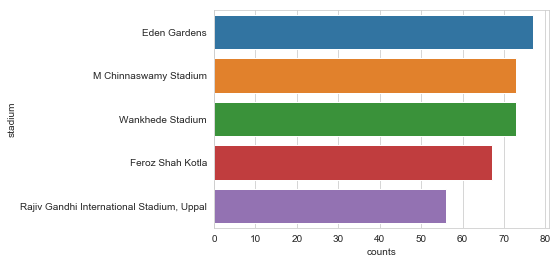

In [69]:
sns.set_style("whitegrid")
sns.barplot(x="counts",y="stadium",data=place.head())